In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##Loading & Analyzing Data

In [2]:
df = pd.read_csv(r"/content/COMBINED_A.csv")
del df["Unnamed: 0"]

for cols in df.columns:
    df[cols] /= max(df[cols])
    
df.head(3)    

,cpi,inc,sav,mor,pop,ue,re
0,0.824685,0.276002,0.145155,1.000000,1.000000,0.779705,0.561828
1,0.861419,0.287661,0.127067,0.871806,0.950821,0.718994,0.552923
2,0.866543,0.301682,0.116072,0.998877,0.884208,0.634866,0.551205


##Data Content

cpi - Median Consumer Price Index <br>
inc - Disposable household income in the United States  <br>
sav - Household saving in the United States  <br>
mor - 30-Year Fixed Rate Mortgage Average in the United States  <br>
pop - Population Growth for the United States  <br>
ue - Unemployment Rate in the United States  <br>
re -  Real Residential Property Prices for United States <br>

In [5]:
df.describe()

,cpi,inc,sav,mor,pop,ue,re
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.767229,0.580389,0.246820,0.693502,0.656927,0.613243,0.720251
std,0.172302,0.211716,0.188764,0.198108,0.185900,0.173473,0.137262
min,0.222383,0.276002,0.083897,0.370873,0.253021,0.382480,0.546953
25%,0.706948,0.396388,0.121728,0.496874,0.528783,0.480486,0.609834
50%,0.805547,0.577634,0.161050,0.699237,0.667311,0.576756,0.693418
75%,0.866543,0.721921,0.352129,0.871806,0.827999,0.718994,0.822052
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpi     29 non-null     float64
 1   inc     29 non-null     float64
 2   sav     29 non-null     float64
 3   mor     29 non-null     float64
 4   pop     29 non-null     float64
 5   ue      29 non-null     float64
 6   re      29 non-null     float64
dtypes: float64(7)
memory usage: 1.7 KB


##Feature Correlation Analysis


1. Disposable household Income and Annual Savings of American households appears to be correlated with the Real Estate prices.
2. Population and housing prices also seem to be inversly proportional, this could be becasue the housing prices are increasing and the population growth seems to be plateauing in the US. This shows that correlation does not imply causation. 
3. It's also interesting to note that Income and Savings of households are negatively coorelated with population growth.



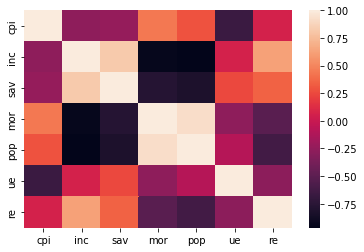

In [3]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix)

In [24]:
corr = corr_matrix["re"].sort_values(ascending = False)
print(corr)

re     1.000000
inc    0.626839
sav    0.353564
cpi    0.066770
ue    -0.268565
mor   -0.513411
pop   -0.624578
Name: re, dtype: float64


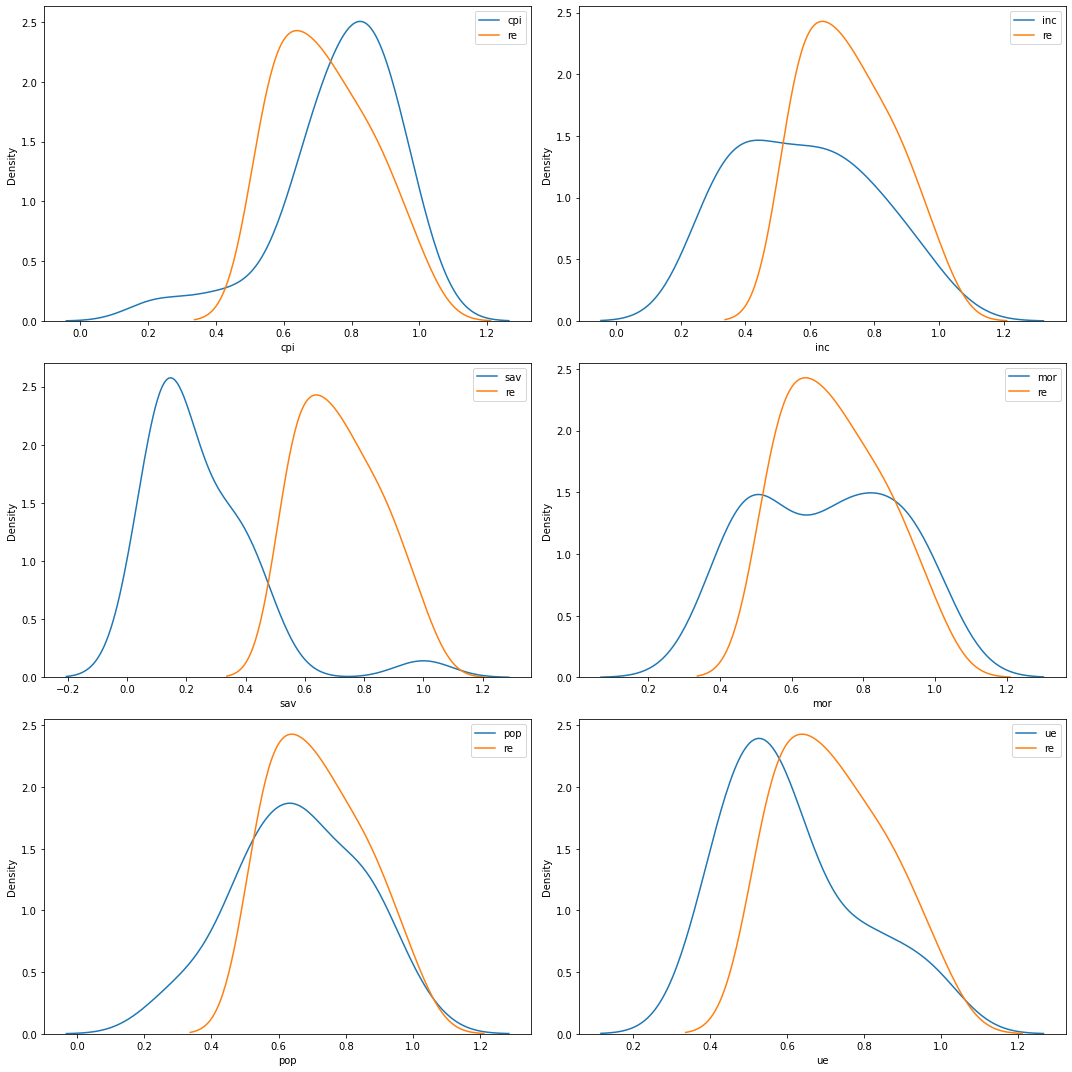

In [20]:
plt.figure(figsize = (15, 15))
cols = df.columns

for ax, col in enumerate(cols[:-1]):
    plt.subplot(3, 2, ax + 1)

    sns.kdeplot(x = df[cols[ax]], label = col)
    sns.kdeplot(x = df[cols[-1]], label = cols[-1])
    plt.legend()

plt.tight_layout()